## LV_1. 모의고사

수포자는 수학을 포기한 사람의 준말입니다. 수포자 삼인방은 모의고사에 수학 문제를 전부 찍으려 합니다. 수포자는 1번 문제부터 마지막 문제까지 다음과 같이 찍습니다.

1번 수포자가 찍는 방식: 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, ...
2번 수포자가 찍는 방식: 2, 1, 2, 3, 2, 4, 2, 5, 2, 1, 2, 3, 2, 4, 2, 5, ...
3번 수포자가 찍는 방식: 3, 3, 1, 1, 2, 2, 4, 4, 5, 5, 3, 3, 1, 1, 2, 2, 4, 4, 5, 5, ...

1번 문제부터 마지막 문제까지의 정답이 순서대로 들은 배열 answers가 주어졌을 때, 가장 많은 문제를 맞힌 사람이 누구인지 배열에 담아 return 하도록 solution 함수를 작성해주세요.

### 제한사항

- 시험은 최대 10,000 문제로 구성되어있습니다.
- 문제의 정답은 1, 2, 3, 4, 5중 하나입니다.
- 가장 높은 점수를 받은 사람이 여럿일 경우, return하는 값을 오름차순 정렬해주세요.

### 입출력 예

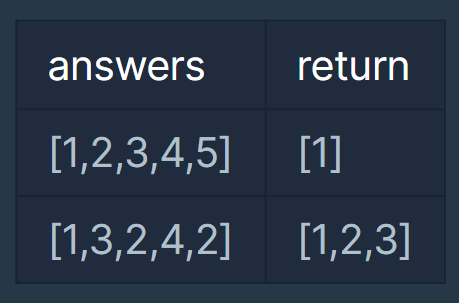

### 입출력 예 #1

수포자 1은 모든 문제를 맞혔습니다.
수포자 2는 모든 문제를 틀렸습니다.
수포자 3은 모든 문제를 틀렸습니다.
따라서 가장 문제를 많이 맞힌 사람은 수포자 1입니다.

### 입출력 예 #2
모든 사람이 2문제씩을 맞췄습니다.

### 내 풀이

In [309]:
from itertools import chain, repeat

# answers = [1,2,3,4,5]
# answers = [1,3,2,4,2]
answers = [3, 3, 1, 1, 2, 2, 4, 4, 5, 5]

def solution(answers):
    # 답지 그릇
    result = []
    # 수포자 1,2,3이 각각 찍는 방법
    person1 = [1, 2, 3, 4, 5]
    person2 = [2, 1, 2, 3, 2, 4, 2, 5]
    person3 = [3, 3, 1, 1, 2, 2, 4, 4, 5, 5]
    
    # 수포자 1,2,3의 성적을 계산하여 담기위한 그릇 제작
    i,j,k = [0,0,0]
    
    person1_result = list(chain.from_iterable(repeat(person1, (len(answers)//len(person1)+1))))
    person2_result = list(chain.from_iterable(repeat(person2, (len(answers)//len(person2)+1))))
    person3_result = list(chain.from_iterable(repeat(person3, (len(answers)//len(person3)+1))))
    
    #수포자 1,2,3의 성적을 계산하여 i,j,k에 담기
    for n,x in enumerate(answers):
        if x == person1_result[n]:
            i += 1
    for n,x in enumerate(answers):
        if x == person2_result[n]:
            j += 1
    for n,x in enumerate(answers):
        if x == person3_result[n]:
            k += 1
    
    # 딕셔너리 형태로 1,2,3과 i,j,k를 묶음
    ans = {1:i,2:j,3:k}
    
    #  내림차순 정렬
    ans_sorted = dict(sorted(ans.items(), key=lambda x: x[1], reverse=True))

    filtered_ans = ans_sorted.copy()

    # value 값이 0인 항목 제거
    for key, value in ans_sorted.items():
        if value == 0:
            del filtered_ans[key]
    
    # value 값이 가장 큰 항목 선정
    max_value = max(ans.values())
    filtered_ans = {key: value for key, value in ans.items() if value == max_value}
    
    for p in filtered_ans:
        result.append(p)
    
    # value 값 모두 같다면 1,2,3 출력
    if i==j==k:
        result = [1,2,3]
    return result

solution(answers)

[3]

### 다른 사람 풀이

In [310]:
answers = [3, 3, 1, 1, 2, 2, 4, 4, 5, 5]

def solution(answers):
    pattern1 = [1,2,3,4,5]
    pattern2 = [2,1,2,3,2,4,2,5]
    pattern3 = [3,3,1,1,2,2,4,4,5,5]
    score = [0, 0, 0]
    result = []

    for idx, answer in enumerate(answers):
        if answer == pattern1[idx%len(pattern1)]:
            score[0] += 1
        if answer == pattern2[idx%len(pattern2)]:
            score[1] += 1
        if answer == pattern3[idx%len(pattern3)]:
            score[2] += 1

    for idx, s in enumerate(score):
        if s == max(score):
            result.append(idx+1)

    return result
solution(answers)

[3]

### 다른 사람 풀이 이해하기

In [311]:
answers = [1,2,3,4,5]

def solution(answers):
    # 수포자123의 찍기 패턴 기록
    pattern1 = [1,2,3,4,5]
    pattern2 = [2,1,2,3,2,4,2,5]
    pattern3 = [3,3,1,1,2,2,4,4,5,5]
    score = [0, 0, 0] # 점수표
    result = [] # 제출할 결과

    # 점수 계산하여 기록
    for idx, answer in enumerate(answers):
        if answer == pattern1[idx%len(pattern1)]:
            score[0] += 1
        if answer == pattern2[idx%len(pattern2)]:
            score[1] += 1
        if answer == pattern3[idx%len(pattern3)]:
            score[2] += 1
    
    # 점수표를 가지고 반복문을 실행
    for idx, s in enumerate(score):
        if s == max(score): # n번 수포자의 점수가 점수표 중 가장 높다면,
            result.append(idx+1) # 결과 제출값에 n번 수포자의 번호를 추가

    return result
solution(answers)

[1]